In [1]:
from evaluate import Evaluate
import matplotlib.pyplot as plt
from PIL import Image
from chart_barh import ChartBarh, MultiChartBarH


In [2]:
# 被缩放的源图像路径
SRC_DIR = '../../data/src/'
IMG_META_NAME = 'img1'
IMG_RESOLUTION_RATIO = '640x360'
IMG_SUFFIX = '.png'
IMG_NAME = IMG_META_NAME + '_' + IMG_RESOLUTION_RATIO + IMG_SUFFIX
SRC_PATH = SRC_DIR + IMG_NAME
SRC_PATH


'../../data/src/img1_640x360.png'

In [3]:
# 缩放后的图像路径
TARGET_DIR = '../../data/target/'
ALGORITHM_NAME_LIST = [
    'bicubic',
    'bilinear',
    'cubicBSpline',
    'lagrange',
    'lanczos2',
    'lanczos3',
    'nearest',
    'newton',
    'shannon'
]
ALGORITHM_ARGS_MAP = {
    'lagrange': [3],
    'newton': [3],
    'shannon': [3]
}
TARGET_IMG_RESOLUTION_RATIO = '160x90'
TARGET_PATH_LIST = []
for algorithm_name in ALGORITHM_NAME_LIST:
    if algorithm_name in ALGORITHM_ARGS_MAP.keys():
        arg_list = ALGORITHM_ARGS_MAP[algorithm_name]
        arg_name = '_p' + '_'.join(str(i) for i in arg_list)
        target_path = TARGET_DIR + IMG_META_NAME + '_' + IMG_RESOLUTION_RATIO + '/' + algorithm_name + '/' + IMG_META_NAME + '_' + TARGET_IMG_RESOLUTION_RATIO + arg_name + IMG_SUFFIX    
    else:
        target_path = TARGET_DIR + IMG_META_NAME + '_' + IMG_RESOLUTION_RATIO + '/' + algorithm_name + '/' + IMG_META_NAME + '_' + TARGET_IMG_RESOLUTION_RATIO + IMG_SUFFIX
    TARGET_PATH_LIST.append(target_path)
TARGET_PATH_LIST


['../../data/target/img1_640x360/bicubic/img1_160x90.png',
 '../../data/target/img1_640x360/bilinear/img1_160x90.png',
 '../../data/target/img1_640x360/cubicBSpline/img1_160x90.png',
 '../../data/target/img1_640x360/lagrange/img1_160x90_p3.png',
 '../../data/target/img1_640x360/lanczos2/img1_160x90.png',
 '../../data/target/img1_640x360/lanczos3/img1_160x90.png',
 '../../data/target/img1_640x360/nearest/img1_160x90.png',
 '../../data/target/img1_640x360/newton/img1_160x90_p3.png',
 '../../data/target/img1_640x360/shannon/img1_160x90_p3.png']

In [4]:
# 缩放后的图像的参考图
ORIGINAL_IMG_PATH = SRC_DIR + IMG_META_NAME + '_' + TARGET_IMG_RESOLUTION_RATIO + IMG_SUFFIX
ORIGINAL_IMG_PATH

'../../data/src/img1_160x90.png'

In [5]:
eva_list = []
for target_path in TARGET_PATH_LIST:
    eva = Evaluate(ORIGINAL_IMG_PATH, target_path)
    eva_list.append(eva)
eva_list


[Evaluate(                    source_path = ../../data/src/img1_160x90.png,                     target_path = ../../data/target/img1_640x360/bicubic/img1_160x90.png,                     psnr = 34.459843,                     ssim = 0.911300,                     ms_ssim = 0.990651,                     ws_psnr = 76.043468,                     s_psnr = 76.043468                 ),
 Evaluate(                    source_path = ../../data/src/img1_160x90.png,                     target_path = ../../data/target/img1_640x360/bilinear/img1_160x90.png,                     psnr = 32.741279,                     ssim = 0.829646,                     ms_ssim = 0.984569,                     ws_psnr = 74.324904,                     s_psnr = 74.324904                 ),
 Evaluate(                    source_path = ../../data/src/img1_160x90.png,                     target_path = ../../data/target/img1_640x360/cubicBSpline/img1_160x90.png,                     psnr = 34.459843,                     ssim = 0.9

In [6]:
img_path_list = [ORIGINAL_IMG_PATH] + TARGET_PATH_LIST
img_name_list = ['original'] + ALGORITHM_NAME_LIST
# img_path_list, img_name_list

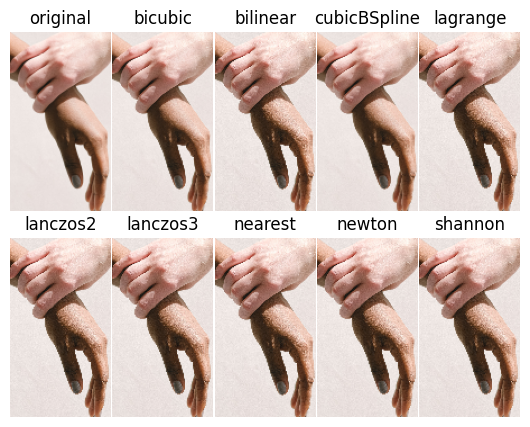

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

for i in range(2):
    for j in range(5):
        img = Image.open(img_path_list[i * 5 + j])
        
        # 显示图像
        ax[i, j].imshow(img)
        ax[i, j].axis('off')
        
        # 添加图像标题
        ax[i, j].set_title(img_name_list[i * 5 + j])

# 调整图像间距
# plt.tight_layout()
plt.subplots_adjust(wspace=-0.72, hspace=0.15)

# 显示图像
plt.show()

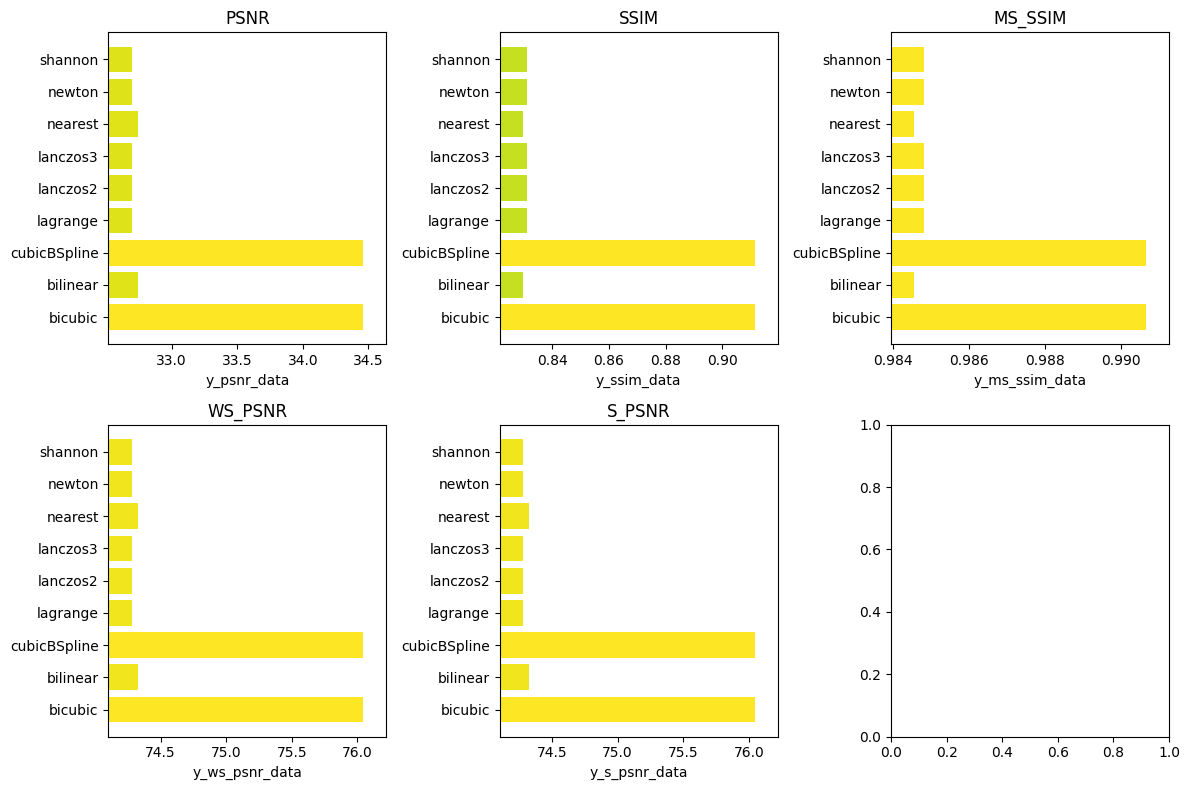

In [9]:
y_psnr_data = [eva.psnr for eva in eva_list]
y_ssim_data = [eva.ssim for eva in eva_list]
y_ms_ssim_data = [eva.ms_ssim for eva in eva_list]
y_ws_psnr_data = [eva.ws_psnr for eva in eva_list]
y_s_psnr_data = [eva.s_psnr for eva in eva_list]

chart_barh_list = [
    ChartBarh(
        data = y_psnr_data,
        yticks = range(len(ALGORITHM_NAME_LIST)),
        yticklabels = ALGORITHM_NAME_LIST,
        xlabel = 'y_psnr_data',
        title = 'PSNR'
    ), 
    ChartBarh(
        data = y_ssim_data,
        yticks = range(len(ALGORITHM_NAME_LIST)),
        yticklabels = ALGORITHM_NAME_LIST,
        xlabel = 'y_ssim_data',
        title = 'SSIM'
    ), 
    ChartBarh(
        data = y_ms_ssim_data,
        yticks = range(len(ALGORITHM_NAME_LIST)),
        yticklabels = ALGORITHM_NAME_LIST,
        xlabel = 'y_ms_ssim_data',
        title = 'MS_SSIM'
    ), 
    ChartBarh(
        data = y_ws_psnr_data,
        yticks = range(len(ALGORITHM_NAME_LIST)),
        yticklabels = ALGORITHM_NAME_LIST,
        xlabel = 'y_ws_psnr_data',
        title = 'WS_PSNR'
    ), 
    ChartBarh(
        data = y_s_psnr_data,
        yticks = range(len(ALGORITHM_NAME_LIST)),
        yticklabels = ALGORITHM_NAME_LIST,
        xlabel = 'y_s_psnr_data',
        title = 'S_PSNR'
    )
]

MultiChartBarH(
    chart_barh_list = chart_barh_list,
    row = 2
).plot()